In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
csv_filename = "shinsegae_data.csv"
df = pd.read_csv(csv_filename)

# 데이터 확인
print(df.head())  # 상위 5개 행 출력
print(df.info())  # 데이터 타입 및 결측값 확인

           날짜   마케팅 캠페인  방문자 수  페이지뷰 수  이탈률 (%)  전환율 (%)  신규 고객 수  \
0  2024-01-01     Email  24915   86635    69.56     2.53     2382   
1  2024-01-02  Referral  44915  122803    57.36     6.82     2042   
2  2024-01-03  Paid Ads  42219  231184    57.00     1.99     2293   
3  2024-01-04  Referral  20343   50946    67.52     1.63      356   
4  2024-01-05  Referral  51403   70204    30.15     7.76     1737   

   장바구니 이탈율 (%)  클릭률 (%)  SNS 팔로워 증가 수  광고 수익률 (ROAS)  고객 획득 비용 (CAC)  \
0         31.42     6.08           403           1.60            7.72   
1         23.26     6.00           833           9.11            4.59   
2         10.86     5.92           277          15.92            1.26   
3         29.81     2.52           426           3.99           21.91   
4         14.94     2.17           641           1.88            8.98   

     광고비 (원)      매출 (원)  
0  239148000  1915290000  
1  121914000  5553600000  
2   37453000  2981875000  
3  101387000  2020265000  
4  20276100

               방문자 수         페이지뷰 수
분기                                 
2024Q1  34164.120879  132092.065934
2024Q2  33027.428571  134735.087912
2024Q3  34516.086957  145209.010870
2024Q4  31616.336957  129463.369565
2025Q1  31305.522222  127095.688889
2025Q2  34995.637363  144074.703297
2025Q3  31228.065217  142178.619565
2025Q4  32822.717391  138851.076087
2026Q1  34723.855556  139252.566667
2026Q2  30525.000000  129165.769231
2026Q3  34306.772727  131355.306818


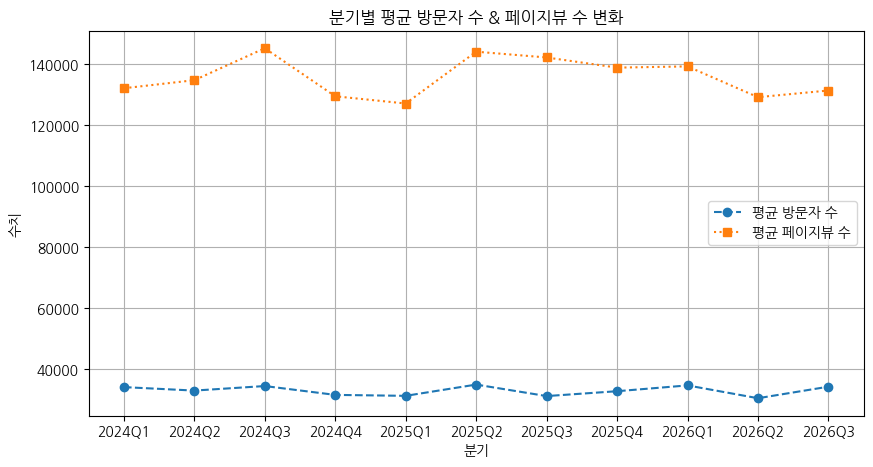

In [19]:

import pandas as pd
import matplotlib.pyplot as plt

# 날짜 컬럼을 datetime 형식으로 변환 (필요한 경우)
df["날짜"] = pd.to_datetime(df["날짜"])

# 분기(Quarter) 컬럼 생성
df["분기"] = df["날짜"].dt.to_period("Q")

# 분기별 평균 방문자 수 & 페이지뷰 수 계산
quarterly_avg = df.groupby("분기")[["방문자 수", "페이지뷰 수"]].mean()

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(quarterly_avg.index.astype(str), quarterly_avg["방문자 수"], label="평균 방문자 수", marker="o", linestyle="dashed")
plt.plot(quarterly_avg.index.astype(str), quarterly_avg["페이지뷰 수"], label="평균 페이지뷰 수", marker="s", linestyle="dotted")

plt.xlabel("분기")
plt.ylabel("수치")
plt.title("분기별 평균 방문자 수 & 페이지뷰 수 변화")
plt.legend()
plt.grid()
plt.show()



<ipython-input-22-0a290cf462c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bounce_rate.index, y=bounce_rate.values, palette="Blues_r")


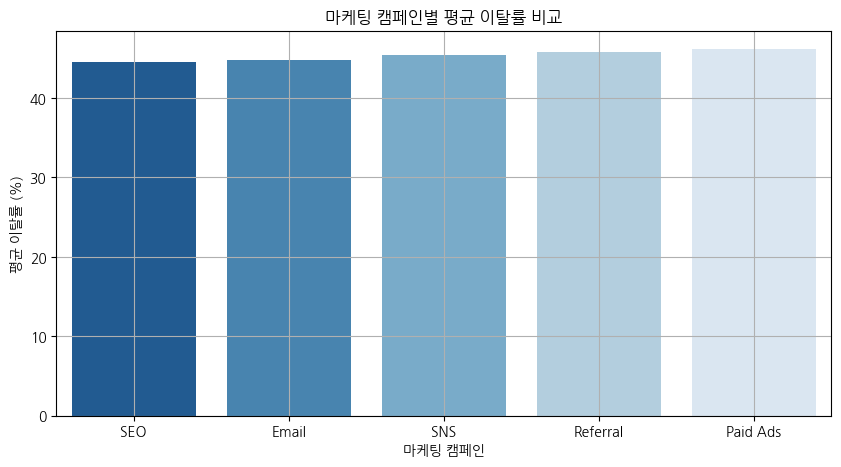

In [22]:
bounce_rate =df.groupby("마케팅 캠페인")["이탈률 (%)"].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=bounce_rate.index, y=bounce_rate.values, palette="Blues_r")
plt.xlabel("마케팅 캠페인")
plt.ylabel("평균 이탈률 (%)")
plt.title("마케팅 캠페인별 평균 이탈률 비교")
plt.grid()
plt.show()

In [25]:
high_abandonment = df.sort_values(by="장바구니 이탈율 (%)", ascending=False).head(5)
low_abandonment = df.sort_values(by="장바구니 이탈율 (%)", ascending=True).head(5)

print("장바구니 이탈율 높은 날짜:")
display(high_abandonment[["날짜", "장바구니 이탈율 (%)", "전환율 (%)", "광고비 (원)"]])

print("\n장바구니 이탈율 낮은 날짜:")
display(low_abandonment[["날짜", "장바구니 이탈율 (%)", "전환율 (%)", "광고비 (원)"]])

장바구니 이탈율 높은 날짜:


,날짜,장바구니 이탈율 (%),전환율 (%),광고비 (원)
565,2025-07-19,64.99,9.86,102297000
9,2024-01-10,64.99,5.08,226967000
262,2024-09-19,64.97,4.43,110903000
166,2024-06-15,64.96,4.04,109876000
613,2025-09-05,64.90,9.43,26949000



장바구니 이탈율 낮은 날짜:


,날짜,장바구니 이탈율 (%),전환율 (%),광고비 (원)
17,2024-01-18,10.07,6.35,200291000
374,2025-01-09,10.09,2.01,126009000
10,2024-01-11,10.12,5.31,137124000
845,2026-04-25,10.16,2.78,167583000
48,2024-02-18,10.22,2.28,51545000


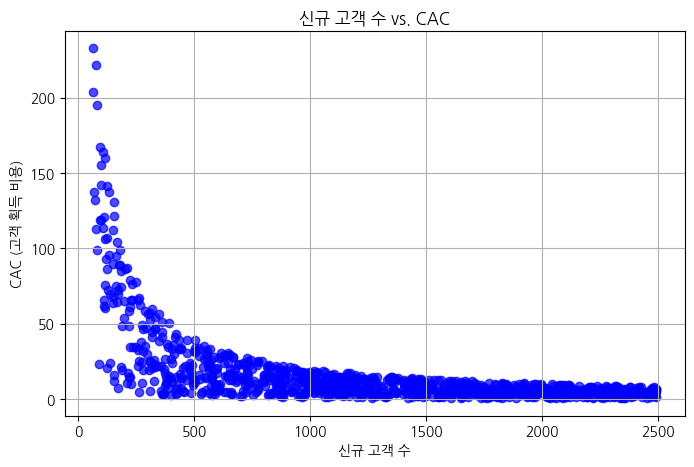

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(df["신규 고객 수"], df["고객 획득 비용 (CAC)"], color="blue", alpha=0.7)
plt.xlabel("신규 고객 수")
plt.ylabel("CAC (고객 획득 비용)")
plt.title("신규 고객 수 vs. CAC")
plt.grid()
plt.show()

<ipython-input-30-d26b950f2c83>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bounce_rate.index, y=bounce_rate.values, palette="RdPu")


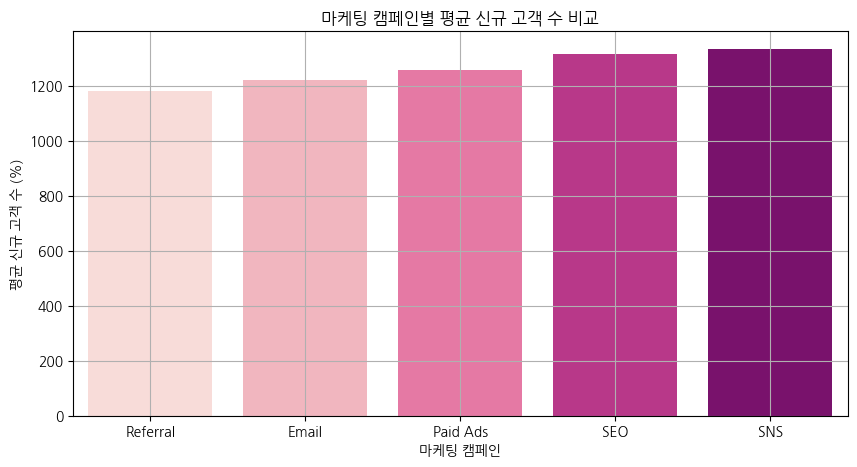

In [30]:
bounce_rate =df.groupby("마케팅 캠페인")["신규 고객 수"].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=bounce_rate.index, y=bounce_rate.values, palette="RdPu")
plt.xlabel("마케팅 캠페인")
plt.ylabel("평균 신규 고객 수 (%)")
plt.title("마케팅 캠페인별 평균 신규 고객 수 비교")
plt.grid()
plt.show()

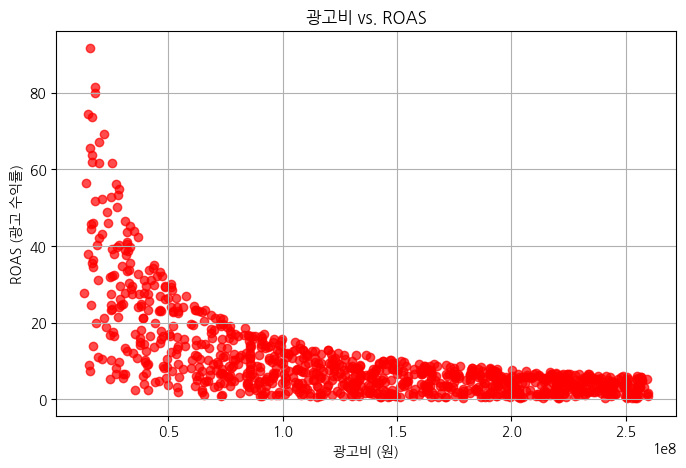

In [31]:
plt.figure(figsize=(8, 5))
plt.scatter(df["광고비 (원)"], df["광고 수익률 (ROAS)"], color="red", alpha=0.7)
plt.xlabel("광고비 (원)")
plt.ylabel("ROAS (광고 수익률)")
plt.title("광고비 vs. ROAS")
plt.grid()
plt.show()

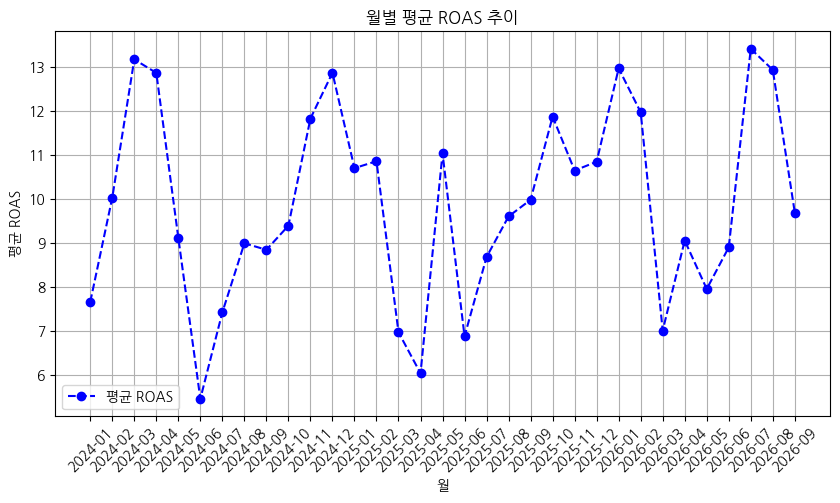

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
file_path = "shinsegae_data.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 날짜 컬럼을 datetime 형식으로 변환
df["날짜"] = pd.to_datetime(df["날짜"])

# 월(Month) 컬럼 생성
df["월"] = df["날짜"].dt.to_period("M")

# 월별 평균 ROAS 계산
monthly_roas = df.groupby("월")["광고 수익률 (ROAS)"].mean()

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(monthly_roas.index.astype(str), monthly_roas.values, marker="o", linestyle="dashed", color="b", label="평균 ROAS")

plt.xlabel("월")
plt.ylabel("평균 ROAS")
plt.title("월별 평균 ROAS 추이")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


<ipython-input-34-c8f288e13c14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bounce_rate.index, y=bounce_rate.values, palette="YlGn")


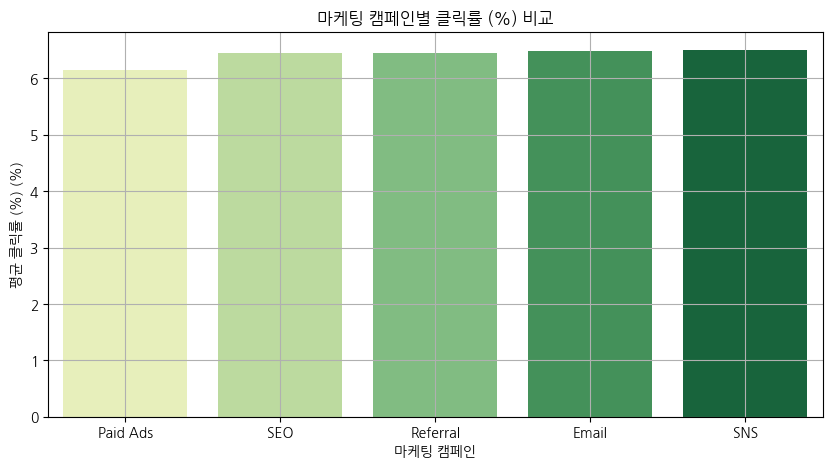

In [34]:
bounce_rate =df.groupby("마케팅 캠페인")["클릭률 (%)"].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=bounce_rate.index, y=bounce_rate.values, palette="YlGn")
plt.xlabel("마케팅 캠페인")
plt.ylabel("평균 클릭률 (%) (%)")
plt.title("마케팅 캠페인별 클릭률 (%) 비교")
plt.grid()
plt.show()

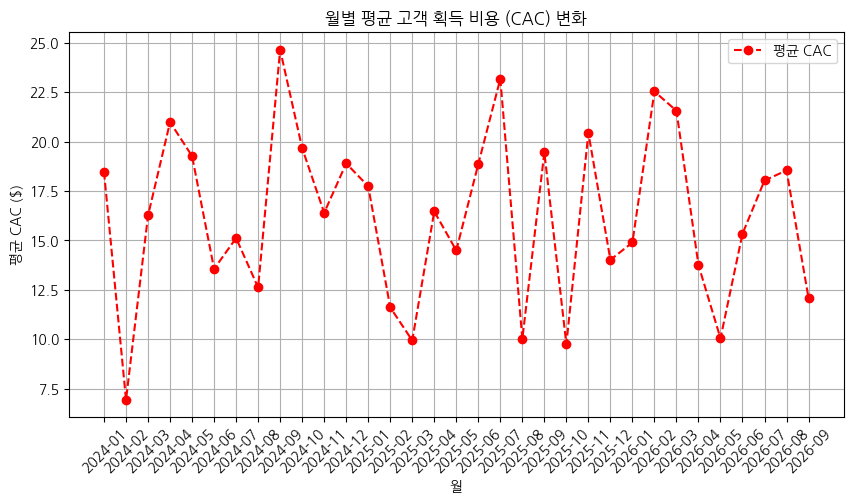

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
file_path = "shinsegae_data.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 날짜 컬럼을 datetime 형식으로 변환
df["날짜"] = pd.to_datetime(df["날짜"])

# 월(Month) 컬럼 생성
df["월"] = df["날짜"].dt.to_period("M")

# 월별 평균 CAC 계산
monthly_cac = df.groupby("월")["고객 획득 비용 (CAC)"].mean()

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(monthly_cac.index.astype(str), monthly_cac.values, marker="o", linestyle="dashed", color="r", label="평균 CAC")

plt.xlabel("월")
plt.ylabel("평균 CAC ($)")
plt.title("월별 평균 고객 획득 비용 (CAC) 변화")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


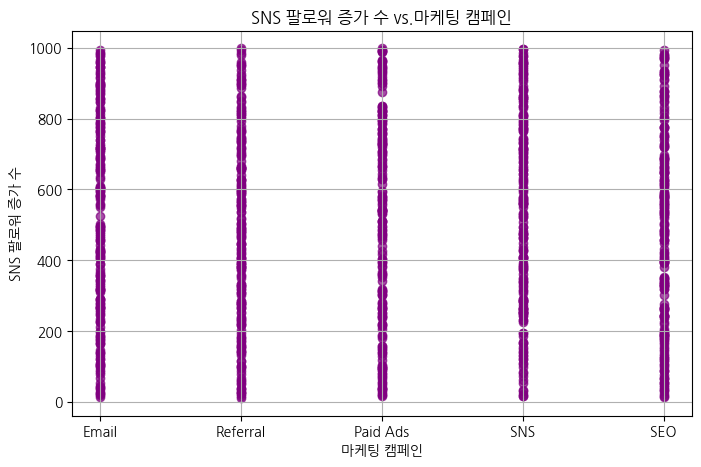

In [49]:
plt.figure(figsize=(8, 5))
plt.scatter( df["마케팅 캠페인"],df["SNS 팔로워 증가 수"], color="purple", alpha=0.7)
plt.xlabel("마케팅 캠페인")
plt.ylabel("SNS 팔로워 증가 수")
plt.title("SNS 팔로워 증가 수 vs.마케팅 캠페인")
plt.grid()
plt.show()

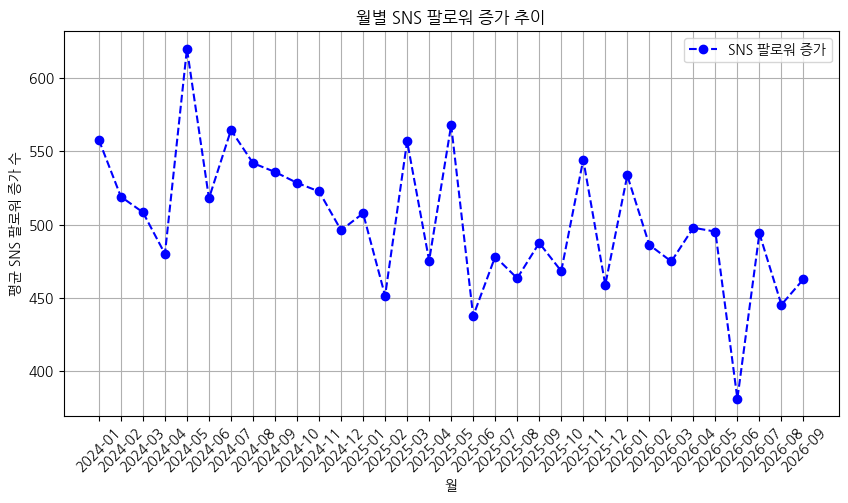

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
file_path = "shinsegae_data.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 날짜 컬럼을 datetime 형식으로 변환
df["날짜"] = pd.to_datetime(df["날짜"])

# 월(Month) 컬럼 생성
df["월"] = df["날짜"].dt.to_period("M")

# 월별 평균 SNS 팔로워 증가 수 계산
monthly_followers = df.groupby("월")["SNS 팔로워 증가 수"].mean()

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(monthly_followers.index.astype(str), monthly_followers.values, marker="o", linestyle="dashed", color="b", label="SNS 팔로워 증가")

plt.xlabel("월")
plt.ylabel("평균 SNS 팔로워 증가 수")
plt.title("월별 SNS 팔로워 증가 추이")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


마케팅 캠페인         object
SNS 팔로워 증가 수     int64
dtype: object


<ipython-input-47-a6726ab7d64f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=campaign_followers, x="마케팅 캠페인", y="SNS 팔로워 증가 수", palette="viridis")


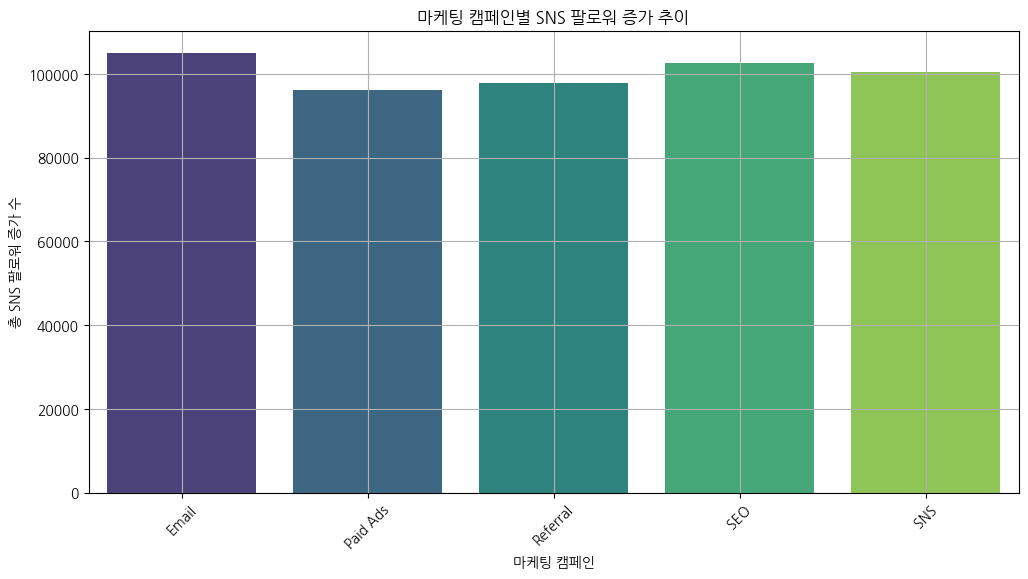

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
file_path = "shinsegae_data.csv"
df = pd.read_csv(file_path)

# 날짜 컬럼 변환
df["날짜"] = pd.to_datetime(df["날짜"], errors="coerce")

# 숫자형 변환 (오류 방지)
df["SNS 팔로워 증가 수"] = pd.to_numeric(df["SNS 팔로워 증가 수"], errors="coerce").fillna(0)

# NaN 제거
df = df.dropna(subset=["마케팅 캠페인", "SNS 팔로워 증가 수"])

# 마케팅 캠페인별 SNS 팔로워 증가 수 계산
campaign_followers = df.groupby("마케팅 캠페인")["SNS 팔로워 증가 수"].sum().reset_index()

# ✅ 데이터 타입 확인 (정상 변환 여부)
print(campaign_followers.dtypes)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=campaign_followers, x="마케팅 캠페인", y="SNS 팔로워 증가 수", palette="viridis")

plt.xlabel("마케팅 캠페인")
plt.ylabel("총 SNS 팔로워 증가 수")
plt.title("마케팅 캠페인별 SNS 팔로워 증가 추이")
plt.xticks(rotation=45)
plt.grid()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 88.3 MB/s eta 0:00:00


<ipython-input-3-572187559c15>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_cac.index, y=campaign_cac.values, palette="coolwarm")


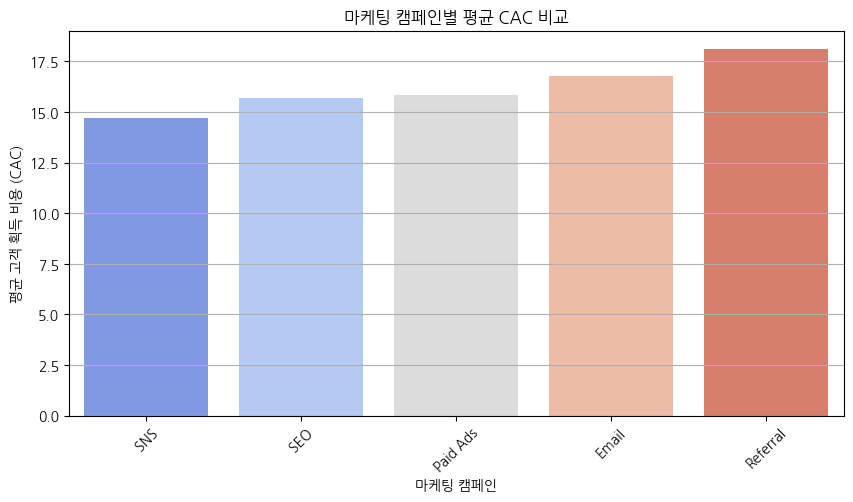

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 데이터 불러오기
df = pd.read_csv("shinsegae_data.csv", parse_dates=["날짜"])

# 마케팅 캠페인별 평균 CAC 계산
campaign_cac = df.groupby("마케팅 캠페인")["고객 획득 비용 (CAC)"].mean().sort_values()

# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=campaign_cac.index, y=campaign_cac.values, palette="coolwarm")
plt.xlabel("마케팅 캠페인")
plt.ylabel("평균 고객 획득 비용 (CAC)")
plt.title("마케팅 캠페인별 평균 CAC 비교")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


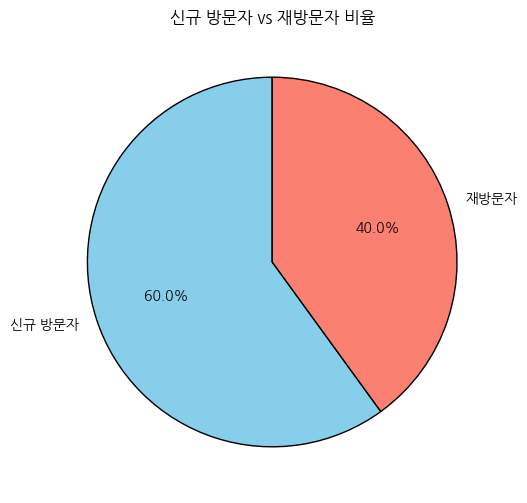

In [4]:
import matplotlib.pyplot as plt

# 신규 방문자와 재방문자의 비율
labels = ["신규 방문자", "재방문자"]
sizes = [60, 40]
colors = ["skyblue", "salmon"]

# 파이 차트 생성
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("신규 방문자 vs 재방문자 비율")
plt.show()
